## Pearson Correaltion, Spearman Correlation and Mutual Information

Provides exploratory analysis of both input features and EMI target outputs.

Visualizes distributions of device parameters and EMI outputs.

Computes correlations and dependencies between simulation inputs and EMI targets.

Identifies anomalies, trends, and initial outliers.

Informs later preprocessing and feature engineering steps.

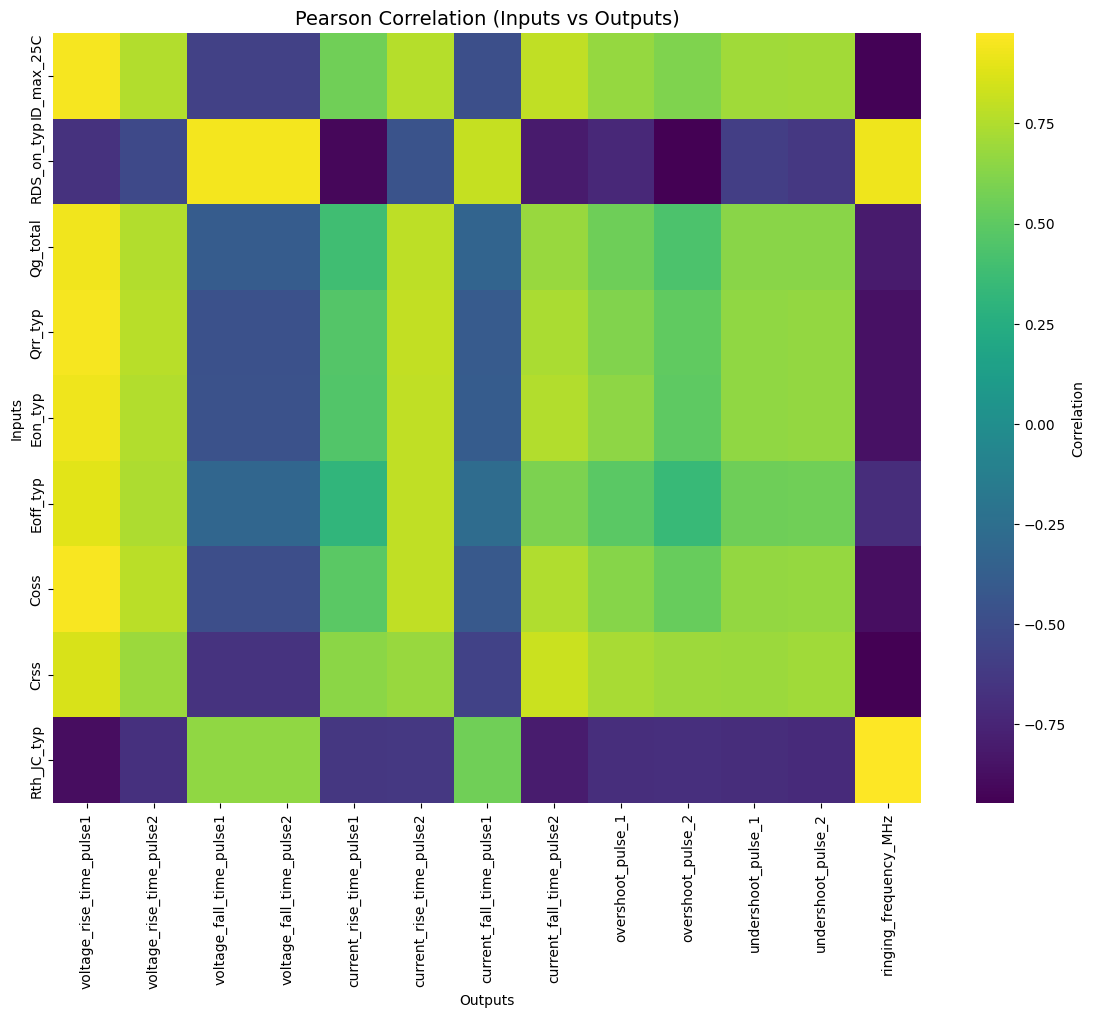

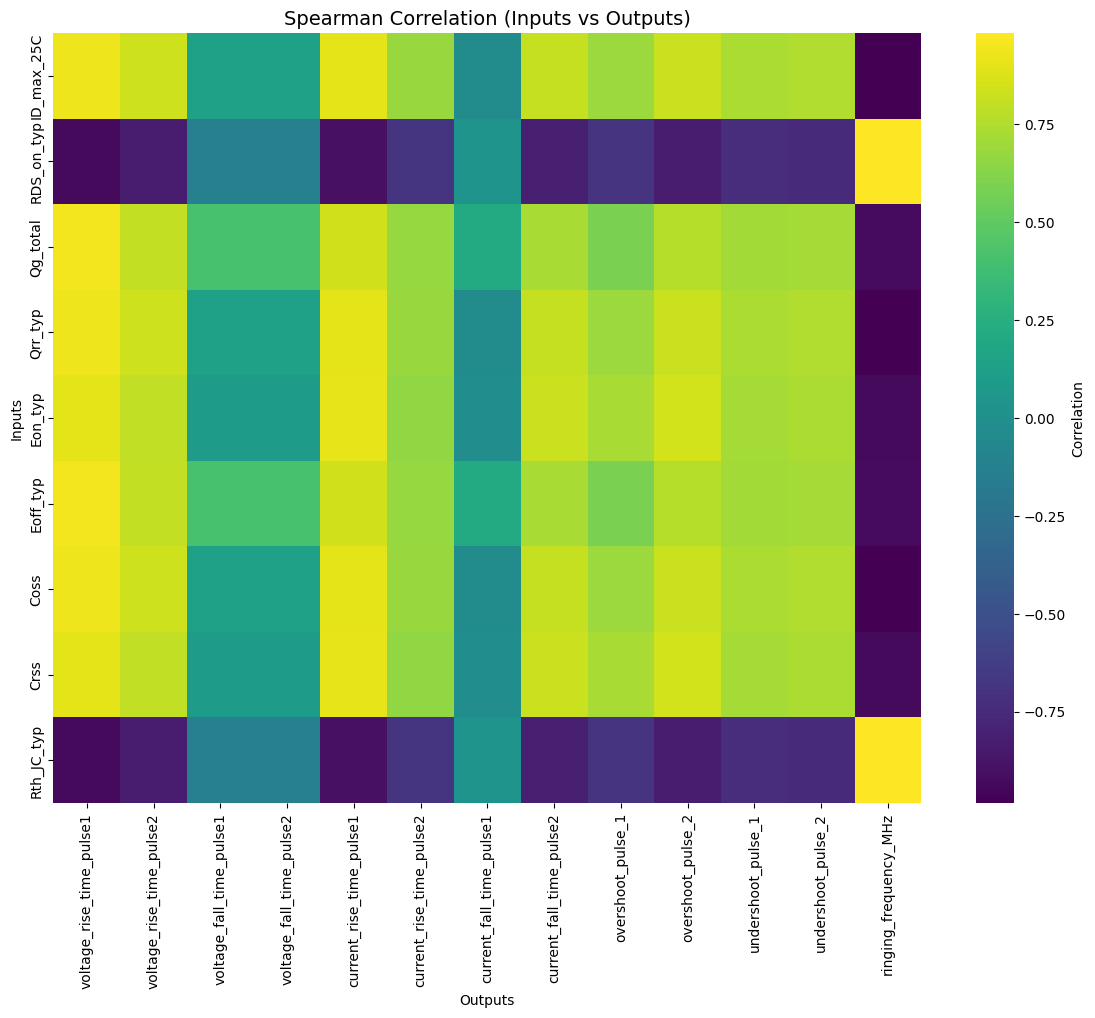

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load your data ===
file_path = r"C:\Users\pc\Desktop\TRAIL\MERGED_FINAL\merged_6_MOSFETs.csv"  # Change to your file
df = pd.read_csv(file_path)

# === Define your selected columns ===
input_cols = [
    "ID_max_25C", "RDS_on_typ", "Qg_total", "Qrr_typ",
    "Eon_typ", "Eoff_typ", "Coss", "Crss",
    "Rth_JC_typ"
]

output_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# Ensure only columns present in dataset are used
input_cols = [col for col in input_cols if col in df.columns]
output_cols = [col for col in output_cols if col in df.columns]

# === Calculate correlations ===
pearson_corr = df[input_cols + output_cols].corr(method='pearson').loc[input_cols, output_cols]
spearman_corr = df[input_cols + output_cols].corr(method='spearman').loc[input_cols, output_cols]

# === Plot heatmaps ===
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, annot=False, cmap='viridis', cbar_kws={'label': 'Correlation'})
plt.title("Pearson Correlation (Inputs vs Outputs)", fontsize=14)
plt.xlabel("Outputs")
plt.ylabel("Inputs")
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr, annot=False, cmap='viridis', cbar_kws={'label': 'Correlation'})
plt.title("Spearman Correlation (Inputs vs Outputs)", fontsize=14)
plt.xlabel("Outputs")
plt.ylabel("Inputs")
plt.show()


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\pearson_input_output.csv
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\spearman_input_output.csv
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\pearson_heatmap.png


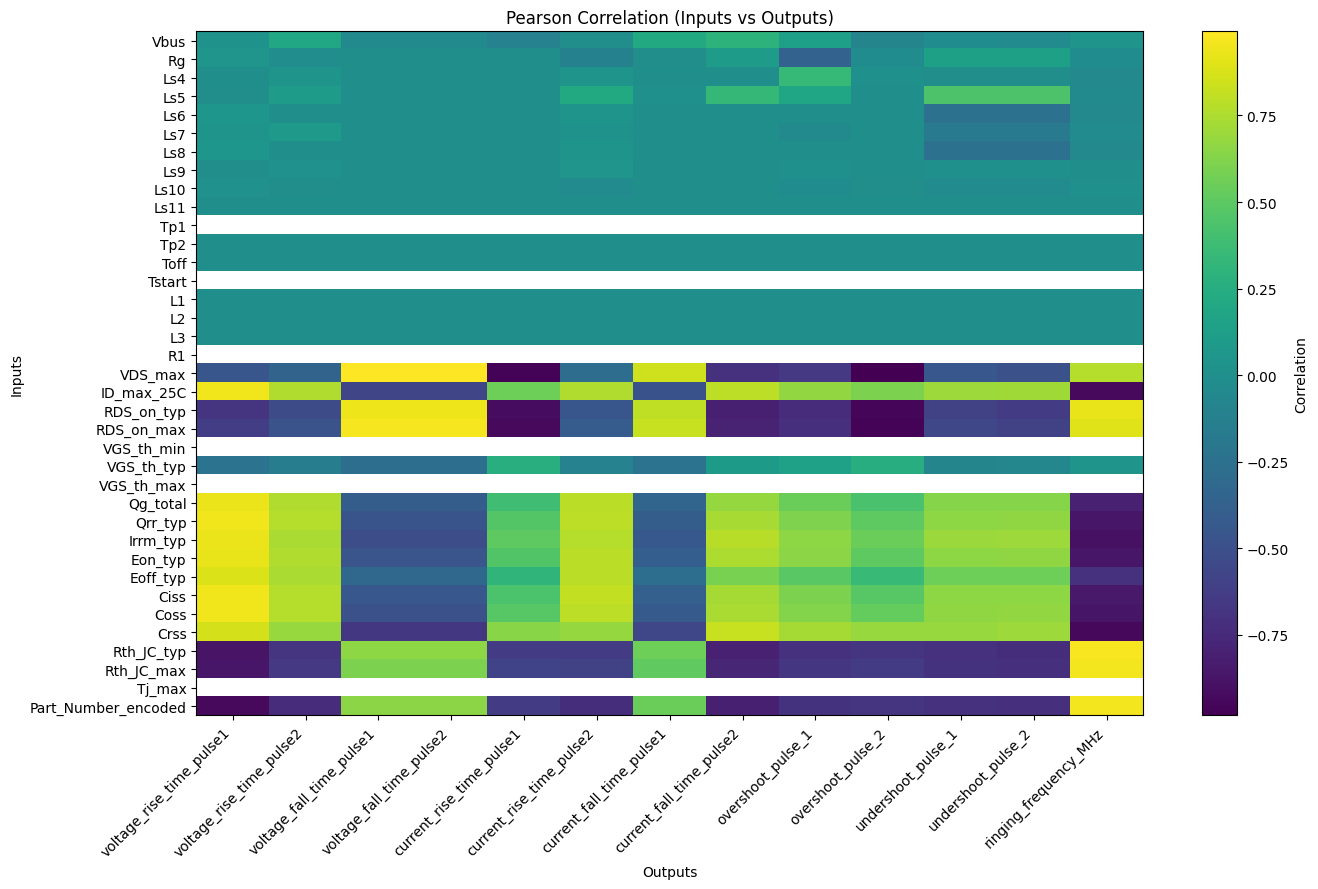

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\spearman_heatmap.png


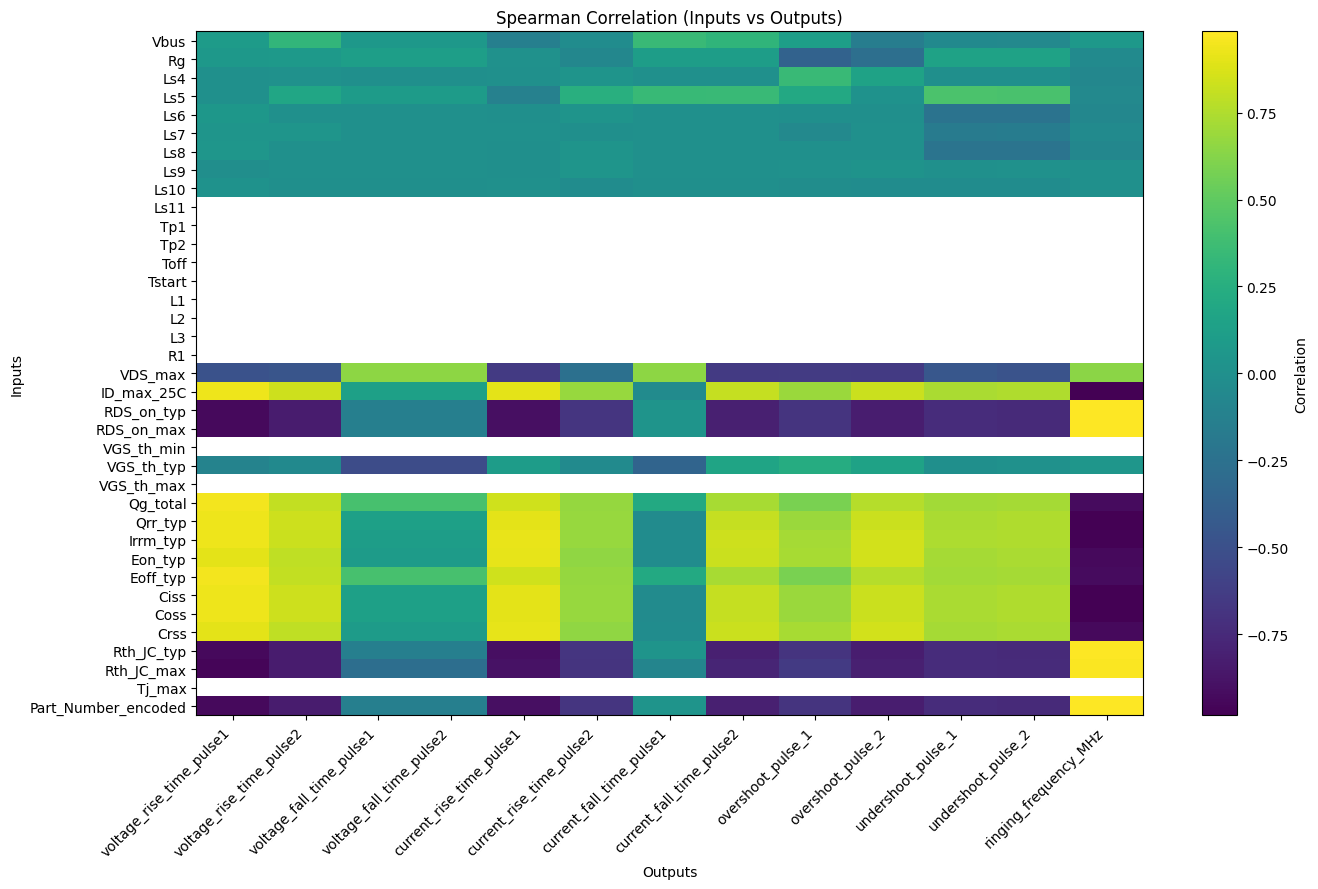


Top features by absolute Pearson correlation:
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\top_features\top_10_pearson.csv


,output,feature,abs_corr
0,voltage_rise_time_pulse1,Coss,0.954141
1,voltage_rise_time_pulse1,Ciss,0.953299
2,voltage_rise_time_pulse1,Qrr_typ,0.953100
3,voltage_rise_time_pulse1,ID_max_25C,0.948077
4,voltage_rise_time_pulse1,Qg_total,0.935322
...,...,...,...
125,ringing_frequency_MHz,RDS_on_typ,0.927432
126,ringing_frequency_MHz,Irrm_typ,0.895477
127,ringing_frequency_MHz,RDS_on_max,0.894570
128,ringing_frequency_MHz,Coss,0.874274



Top features by absolute Spearman correlation:
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\top_features\top_10_spearman.csv


,output,feature,abs_corr
0,voltage_rise_time_pulse1,Rth_JC_max,0.954638
1,voltage_rise_time_pulse1,Qg_total,0.946307
2,voltage_rise_time_pulse1,Eoff_typ,0.946307
3,voltage_rise_time_pulse1,RDS_on_typ,0.935496
4,voltage_rise_time_pulse1,Qrr_typ,0.935496
...,...,...,...
125,ringing_frequency_MHz,Qrr_typ,0.983589
126,ringing_frequency_MHz,RDS_on_max,0.983589
127,ringing_frequency_MHz,RDS_on_typ,0.983589
128,ringing_frequency_MHz,Irrm_typ,0.971333


In [7]:
# === STEP 2: Pearson & Spearman correlations (display + save) ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths
OUTPUT_DIR = r"c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL"
X_path = os.path.join(OUTPUT_DIR, "X_original.csv")
Y_path = os.path.join(OUTPUT_DIR, "Y_original.csv")

# Load
X = pd.read_csv(X_path)
Y = pd.read_csv(Y_path)

# Drop the categorical string column from numeric correlations (keep encoded)
if "Part_Number" in X.columns:
    X_num = X.drop(columns=["Part_Number"])
else:
    X_num = X.copy()

# Ensure numeric
X_num = X_num.apply(pd.to_numeric, errors="coerce")
Y = Y.apply(pd.to_numeric, errors="coerce")

# Helper to compute correlation matrix efficiently
def corr_matrix(X_df, Y_df, method="pearson"):
    mat = np.zeros((X_df.shape[1], Y_df.shape[1]), dtype=float)
    for i, xcol in enumerate(X_df.columns):
        x = X_df[xcol]
        for j, ycol in enumerate(Y_df.columns):
            mat[i, j] = x.corr(Y_df[ycol], method=method)
    return pd.DataFrame(mat, index=X_df.columns, columns=Y_df.columns)

pearson_corr = corr_matrix(X_num, Y, method="pearson")
spearman_corr = corr_matrix(X_num, Y, method="spearman")

# Save CSVs
pearson_path = os.path.join(OUTPUT_DIR, "pearson_input_output.csv")
spearman_path = os.path.join(OUTPUT_DIR, "spearman_input_output.csv")
pearson_corr.to_csv(pearson_path)
spearman_corr.to_csv(spearman_path)
print(f"[SAVED] {pearson_path}")
print(f"[SAVED] {spearman_path}")

# --- Plotting (matplotlib only, inline + save) ---
def plot_heatmap(matrix: pd.DataFrame, title: str, fname: str):
    plt.figure(figsize=(14, 9))
    im = plt.imshow(matrix.values, aspect="auto", interpolation="nearest")
    plt.title(title)
    plt.xlabel("Outputs")
    plt.ylabel("Inputs")
    plt.xticks(range(matrix.shape[1]), matrix.columns, rotation=45, ha="right")
    plt.yticks(range(matrix.shape[0]), matrix.index)
    cbar = plt.colorbar(im)
    cbar.set_label("Correlation")
    plt.tight_layout()
    save_path = os.path.join(OUTPUT_DIR, fname)
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"[SAVED] {save_path}")
    plt.show()

plot_heatmap(pearson_corr, "Pearson Correlation (Inputs vs Outputs)", "pearson_heatmap.png")
plot_heatmap(spearman_corr, "Spearman Correlation (Inputs vs Outputs)", "spearman_heatmap.png")

# --- Optional: quick top-N table per output (display + save) ---
TOP_N = 10
top_dir = os.path.join(OUTPUT_DIR, "top_features")
os.makedirs(top_dir, exist_ok=True)

def top_n_table(corr_df: pd.DataFrame, method_name: str):
    rows = []
    for out in corr_df.columns:
        s = corr_df[out].abs().sort_values(ascending=False).head(TOP_N)
        tmp = pd.DataFrame({"feature": s.index, "abs_corr": s.values})
        tmp.insert(0, "output", out)
        rows.append(tmp)
    tbl = pd.concat(rows, ignore_index=True)
    csv_path = os.path.join(top_dir, f"top_{TOP_N}_{method_name}.csv")
    tbl.to_csv(csv_path, index=False)
    print(f"[SAVED] {csv_path}")
    return tbl

print("\nTop features by absolute Pearson correlation:")
display(top_n_table(pearson_corr, "pearson"))

print("\nTop features by absolute Spearman correlation:")
display(top_n_table(spearman_corr, "spearman"))


[INFO] Loaded X: (518010, 38), Y: (518010, 13)
[INFO] Balanced subsample: 60,000 rows (10000 per device).


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  13 | elapsed:   58.9s remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.0min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   6 out of  13 | elapsed:  1.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:  1.1min remaining:   39.8s
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:  2.1min remaining:   37.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.1min finished


[INFO] MI (continuous) computed in 129.1s on 60,000 rows and 37 features.
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mutual_info_input_output_FAST.csv
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mutual_info_input_output_normalized_FAST.csv
[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_heatmap_FAST.png


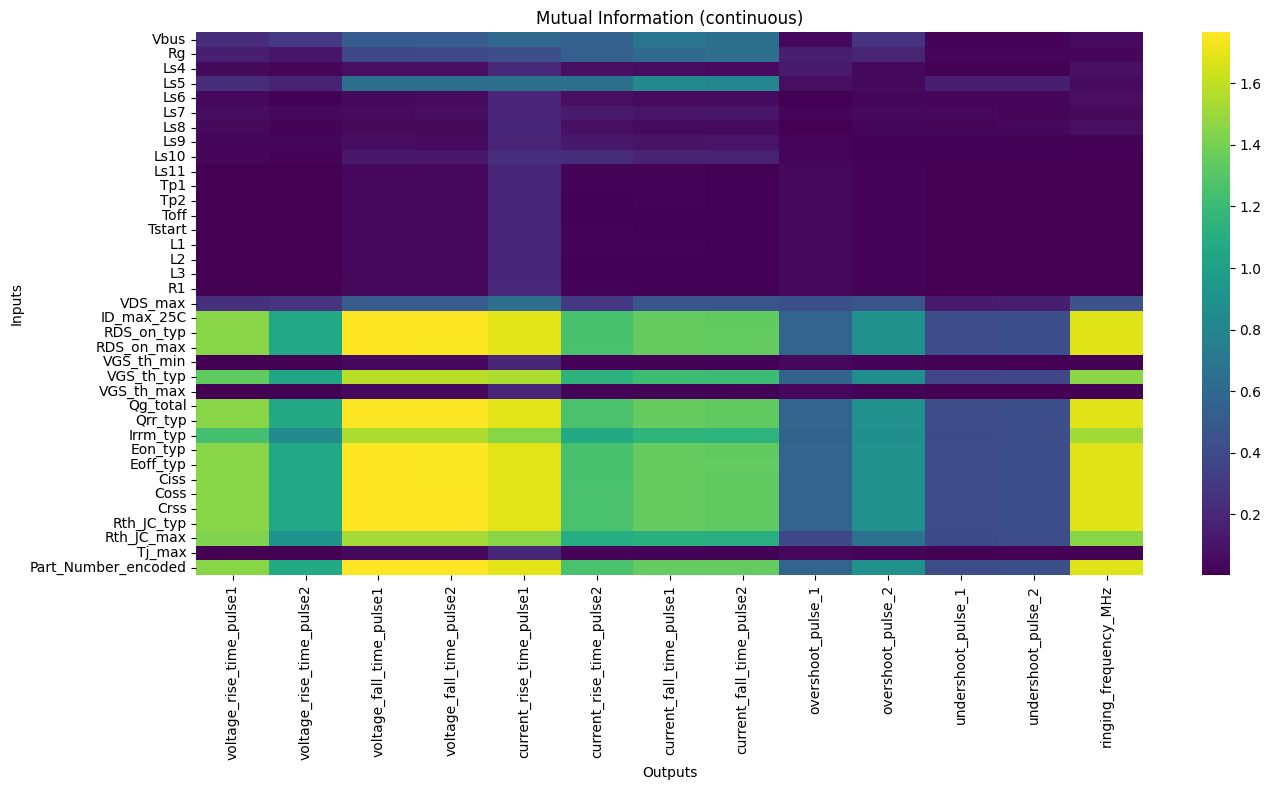

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_heatmap_normalized_FAST.png


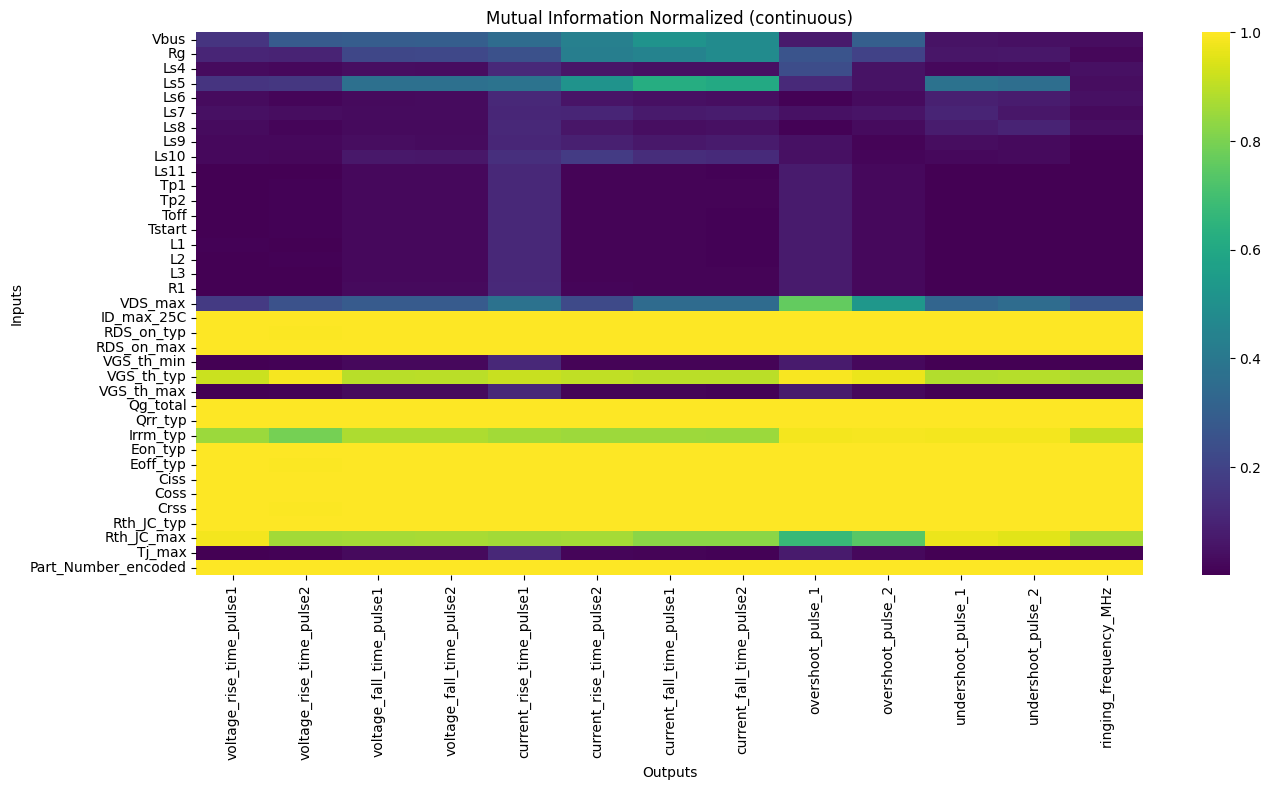

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_voltage_rise_time_pulse1.png


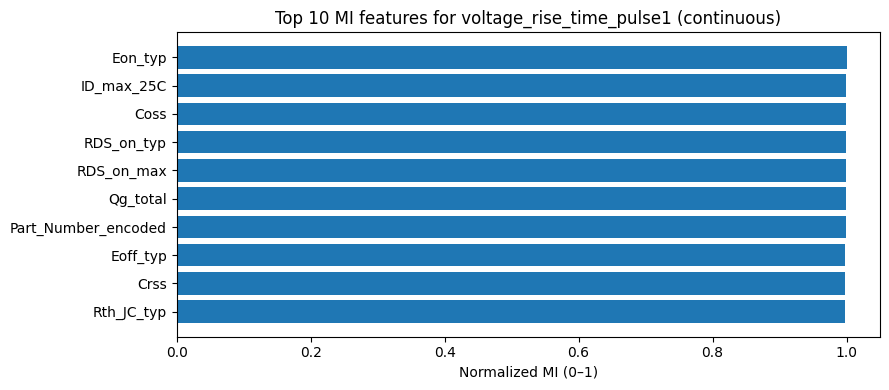

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_voltage_rise_time_pulse2.png


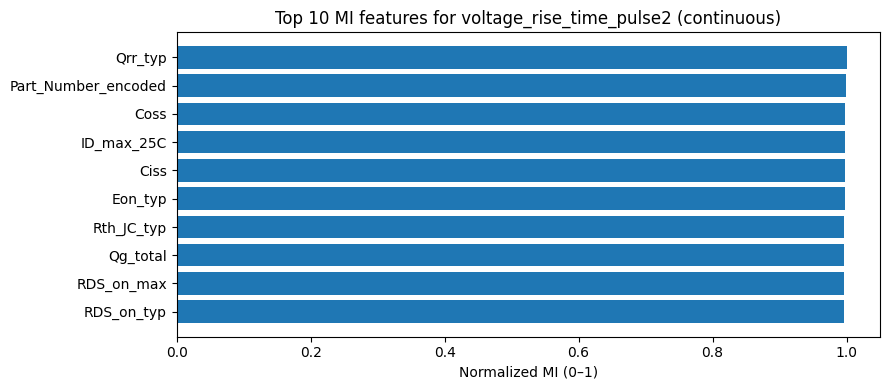

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_voltage_fall_time_pulse1.png


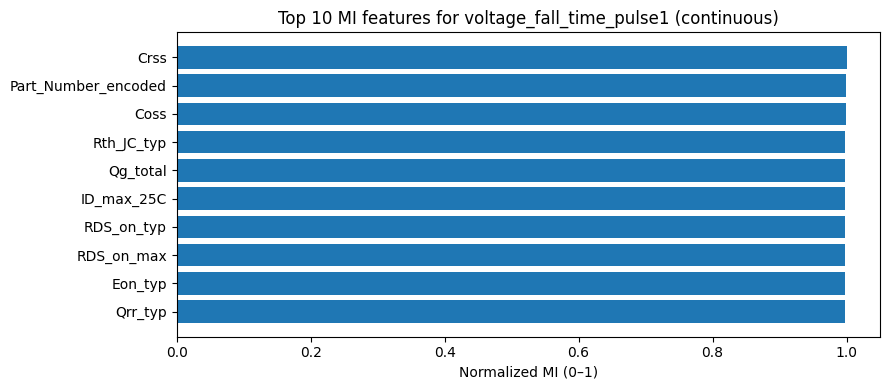

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_voltage_fall_time_pulse2.png


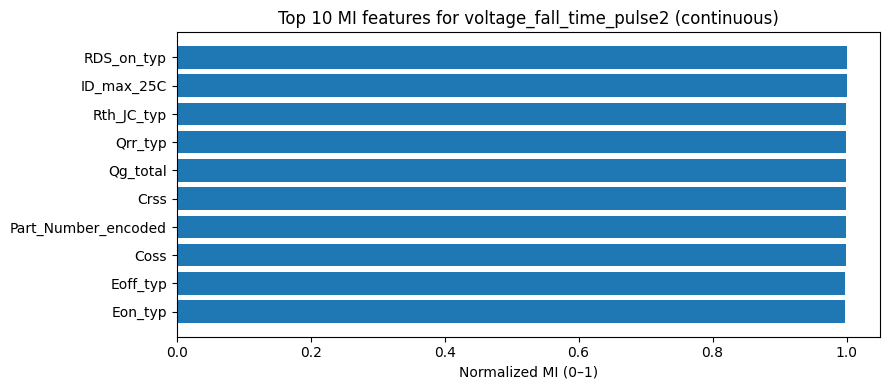

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_current_rise_time_pulse1.png


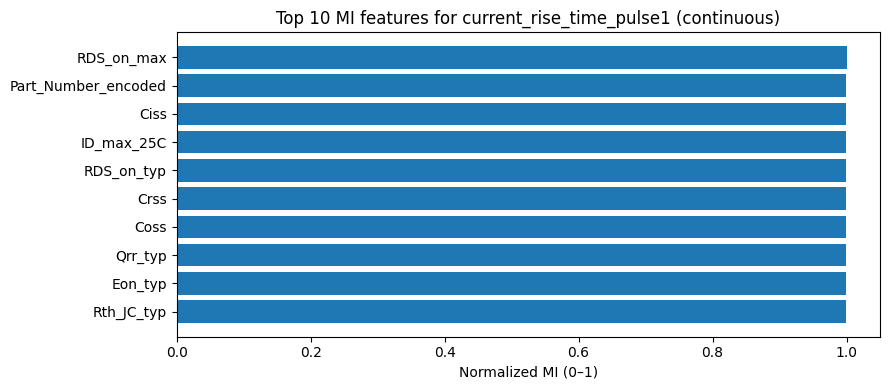

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_current_rise_time_pulse2.png


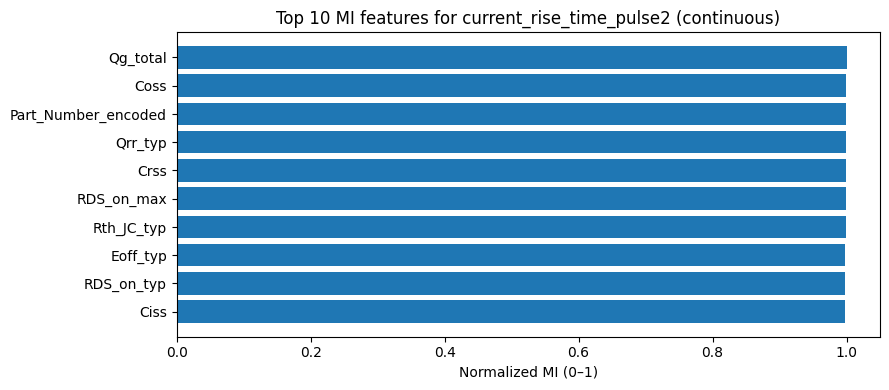

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_current_fall_time_pulse1.png


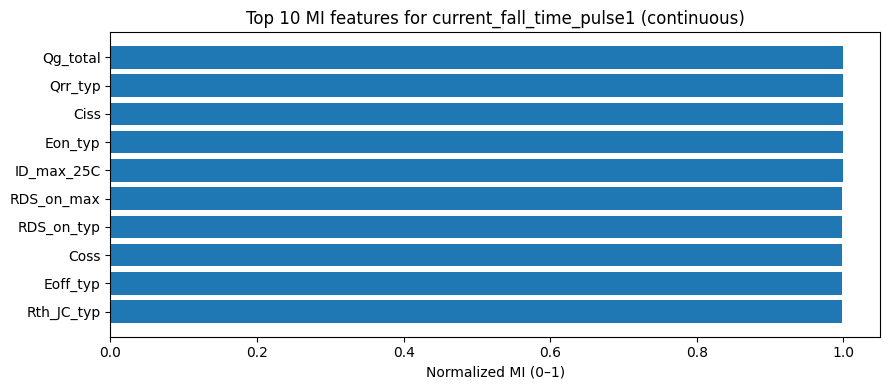

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_current_fall_time_pulse2.png


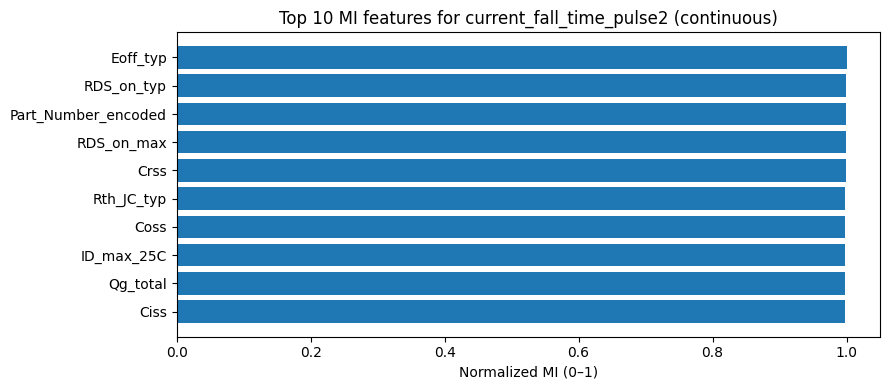

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_overshoot_pulse_1.png


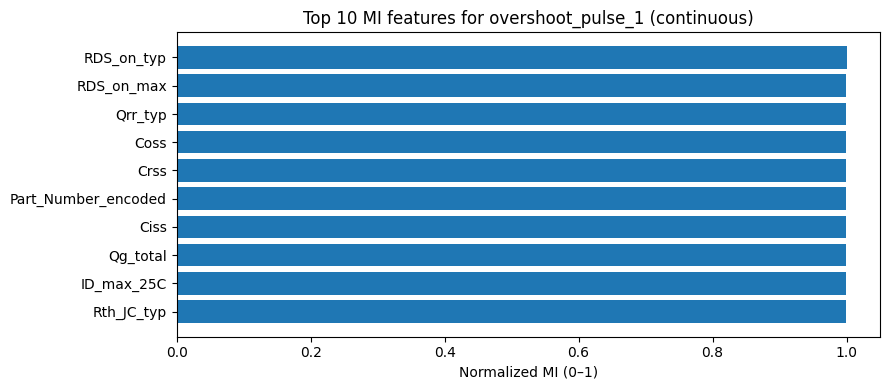

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_overshoot_pulse_2.png


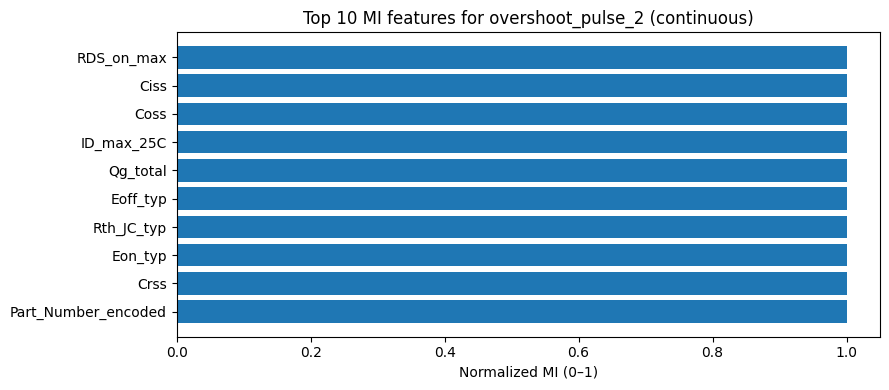

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_undershoot_pulse_1.png


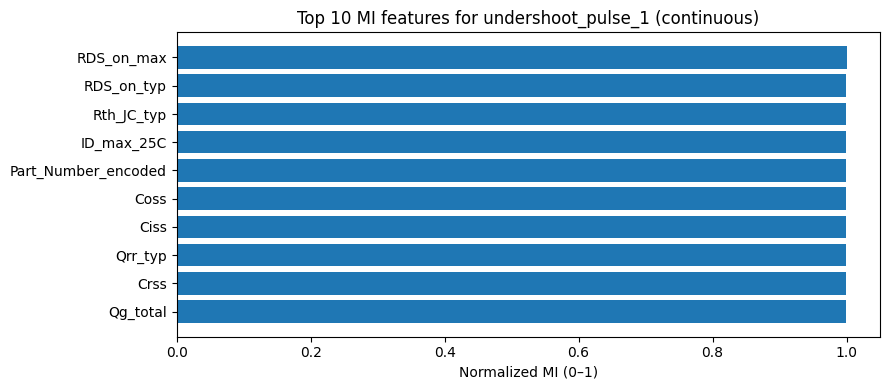

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_undershoot_pulse_2.png


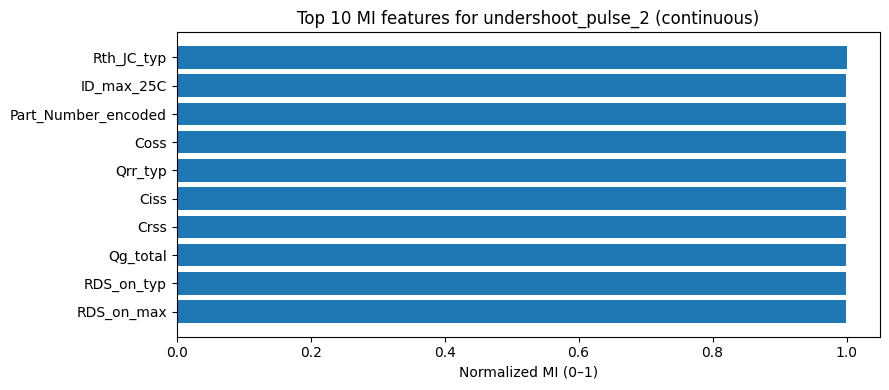

[SAVED] c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL\mi_top_bars_FAST\mi_top_10_ringing_frequency_MHz.png


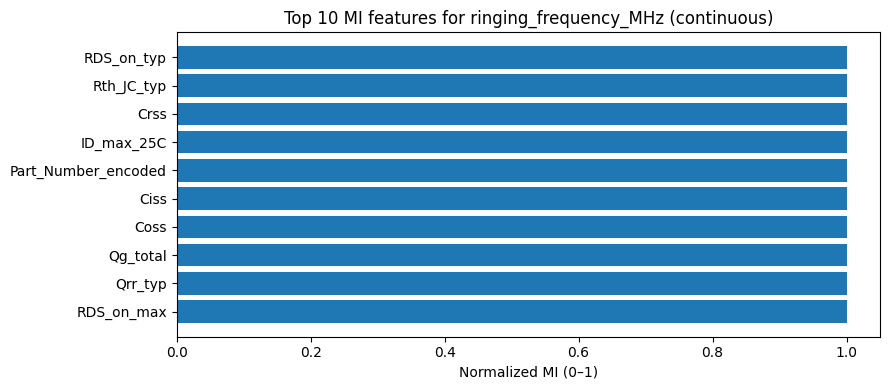

[DONE] Fast MI finished ✓


In [3]:
# === FAST Mutual Information (continuous + optional discrete fallback) ===
import os, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from joblib import Parallel, delayed

# ---------------- Config ----------------
OUTPUT_DIR = r"c:\Users\pc\Desktop\TRAIL\EDA_ORIGINAL"
X_PATH = os.path.join(OUTPUT_DIR, "X_original.csv")
Y_PATH = os.path.join(OUTPUT_DIR, "Y_original.csv")

# Speed / robustness toggles
INCLUDE_PART_NUMBER_ENCODED = True     # set False to exclude for generalization-focused MI
BALANCED_SUBSAMPLE_PER_DEVICE = 10000  # None to use full data; else rows per device (e.g., 5000–20000)
RANDOM_SEED = 42
USE_DISCRETE_MI_FALLBACK = False       # set True if you want the super-fast quantile-binned MI
BINS_FOR_DISCRETE_MI = 20
TOP_N = 10

# ---------------- Load ----------------
X_full = pd.read_csv(X_PATH)
Y_full = pd.read_csv(Y_PATH)
print(f"[INFO] Loaded X: {X_full.shape}, Y: {Y_full.shape}")

# Keep/Drop Part_Number columns
drop_cols = []
if "Part_Number" in X_full.columns:
    drop_cols.append("Part_Number")
if not INCLUDE_PART_NUMBER_ENCODED and "Part_Number_encoded" in X_full.columns:
    drop_cols.append("Part_Number_encoded")
if drop_cols:
    X_full = X_full.drop(columns=drop_cols)

# ---------------- Balanced subsample (by device) ----------------
rng = np.random.default_rng(RANDOM_SEED)
if BALANCED_SUBSAMPLE_PER_DEVICE and "Part_Number_encoded" in pd.read_csv(X_PATH).columns:
    # Use the label column from the saved X to form masks (even if excluded from MI)
    part_labels = pd.read_csv(X_PATH)["Part_Number_encoded"].values
    unique_parts = np.unique(part_labels)
    idx_list = []
    for p in unique_parts:
        mask = np.flatnonzero(part_labels == p)
        take = min(BALANCED_SUBSAMPLE_PER_DEVICE, mask.size)
        choose = rng.choice(mask, size=take, replace=False)
        idx_list.append(choose)
    idx = np.concatenate(idx_list)
    X = X_full.iloc[idx].reset_index(drop=True)
    Y = Y_full.iloc[idx].reset_index(drop=True)
    print(f"[INFO] Balanced subsample: {len(idx):,} rows ({BALANCED_SUBSAMPLE_PER_DEVICE} per device).")
else:
    X, Y = X_full.copy(), Y_full.copy()
    print(f"[INFO] Using full data for MI: {X.shape[0]:,} rows.")

# ---------------- Clean / Impute ----------------
X = X.apply(pd.to_numeric, errors="coerce").astype(np.float32)
Y = Y.apply(pd.to_numeric, errors="coerce").astype(np.float32)
impX = SimpleImputer(strategy="median")
impY = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(impX.fit_transform(X), columns=X.columns)
Y_imp = pd.DataFrame(impY.fit_transform(Y), columns=Y.columns)


# ---------------- Continuous MI (parallel over outputs) ----------------
def mi_for_target(ycol):
    y = Y_imp[ycol].values
    scores = mutual_info_regression(X_imp, y, random_state=RANDOM_SEED, n_neighbors=3)
    return ycol, scores

start = time.time()
if not USE_DISCRETE_MI_FALLBACK:
    results = Parallel(n_jobs=-1, verbose=10)(delayed(mi_for_target)(c) for c in Y_imp.columns)
    mi_mat = np.column_stack([scores for _, scores in results])
    mi_df = pd.DataFrame(mi_mat, index=X_imp.columns, columns=[c for c, _ in results])
    mode_used = "continuous"
else:
    # ---------------- Discrete MI fallback (super fast) ----------------
    kbX = KBinsDiscretizer(n_bins=BINS_FOR_DISCRETE_MI, encode="ordinal", strategy="quantile")
    kbY = KBinsDiscretizer(n_bins=BINS_FOR_DISCRETE_MI, encode="ordinal", strategy="quantile")
    Xb = pd.DataFrame(kbX.fit_transform(X_imp), columns=X_imp.columns).astype(int)
    Yb = pd.DataFrame(kbY.fit_transform(Y_imp), columns=Y_imp.columns).astype(int)
    mi = np.zeros((Xb.shape[1], Yb.shape[1]), dtype=float)
    for j, ycol in enumerate(Yb.columns):
        y = Yb[ycol].values
        for i, xcol in enumerate(Xb.columns):
            mi[i, j] = mutual_info_score(Xb[xcol].values, y)
    mi_df = pd.DataFrame(mi, index=Xb.columns, columns=Yb.columns)
    mode_used = f"discrete (quantile bins={BINS_FOR_DISCRETE_MI})"

elapsed = time.time() - start
print(f"[INFO] MI ({mode_used}) computed in {elapsed:.1f}s on {X_imp.shape[0]:,} rows and {X_imp.shape[1]} features.")

# ---------------- Save raw + normalized MI ----------------
mi_csv = os.path.join(OUTPUT_DIR, f"mutual_info_input_output_{'FAST' if BALANCED_SUBSAMPLE_PER_DEVICE else 'FULL'}.csv")
mi_df.to_csv(mi_csv)
print(f"[SAVED] {mi_csv}")

# Normalize per output to 0–1 for easier visual compare
mi_norm = mi_df.div(mi_df.max(axis=0).replace(0, np.nan), axis=1).fillna(0.0)
mi_norm_csv = os.path.join(OUTPUT_DIR, f"mutual_info_input_output_normalized_{'FAST' if BALANCED_SUBSAMPLE_PER_DEVICE else 'FULL'}.csv")
mi_norm.to_csv(mi_norm_csv)
print(f"[SAVED] {mi_norm_csv}")

# ---------------- Heatmaps ----------------
def plot_heatmap(df, title, fname):
    plt.figure(figsize=(14, 8))
    sns.heatmap(df, cmap="viridis")
    plt.title(title)
    plt.xlabel("Outputs"); plt.ylabel("Inputs")
    plt.tight_layout()
    path = os.path.join(OUTPUT_DIR, fname)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"[SAVED] {path}")
    plt.show()

plot_heatmap(mi_df, f"Mutual Information ({mode_used})", f"mi_heatmap_{'FAST' if BALANCED_SUBSAMPLE_PER_DEVICE else 'FULL'}.png")
plot_heatmap(mi_norm, f"Mutual Information Normalized ({mode_used})", f"mi_heatmap_normalized_{'FAST' if BALANCED_SUBSAMPLE_PER_DEVICE else 'FULL'}.png")

# ---------------- Top-N per output (from normalized MI for readability) ----------------
bars_dir = os.path.join(OUTPUT_DIR, f"mi_top_bars_{'FAST' if BALANCED_SUBSAMPLE_PER_DEVICE else 'FULL'}")
os.makedirs(bars_dir, exist_ok=True)

for out in mi_norm.columns:
    s = mi_norm[out].sort_values(ascending=False).head(TOP_N)
    plt.figure(figsize=(9, 4))
    plt.barh(s.index, s.values)
    plt.gca().invert_yaxis()
    plt.title(f"Top {TOP_N} MI features for {out} ({mode_used})")
    plt.xlabel("Normalized MI (0–1)")
    plt.tight_layout()
    save_path = os.path.join(bars_dir, f"mi_top_{TOP_N}_{out}.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"[SAVED] {save_path}")
    plt.show()

print("[DONE] Fast MI finished ✓")
